In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r'C:\Users\Nayee\OneDrive\Desktop\matplotlib\env\TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/16/2016,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,8/17/2016,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,8/18/2016,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,8/19/2016,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,8/22/2016,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
data=data.drop(columns=['Date'])

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [7]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Volume'])
y=data['Volume']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.fit_transform(X_test)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train_scaler)
X_test_poly=poly.fit_transform(X_test_scaler)

In [60]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [61]:
poly.fit(X_poly_train,y_train)
lin.fit(X_poly_train,y_train)

LinearRegression()

In [62]:
y_pred=lin.predict(X_test_poly)

In [63]:
from sklearn.metrics import mean_absolute_error
mea=mean_absolute_error
print(mea(y_test,y_pred))

14995197.943774631


In [64]:
residuals=y_test-y_pred

In [43]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

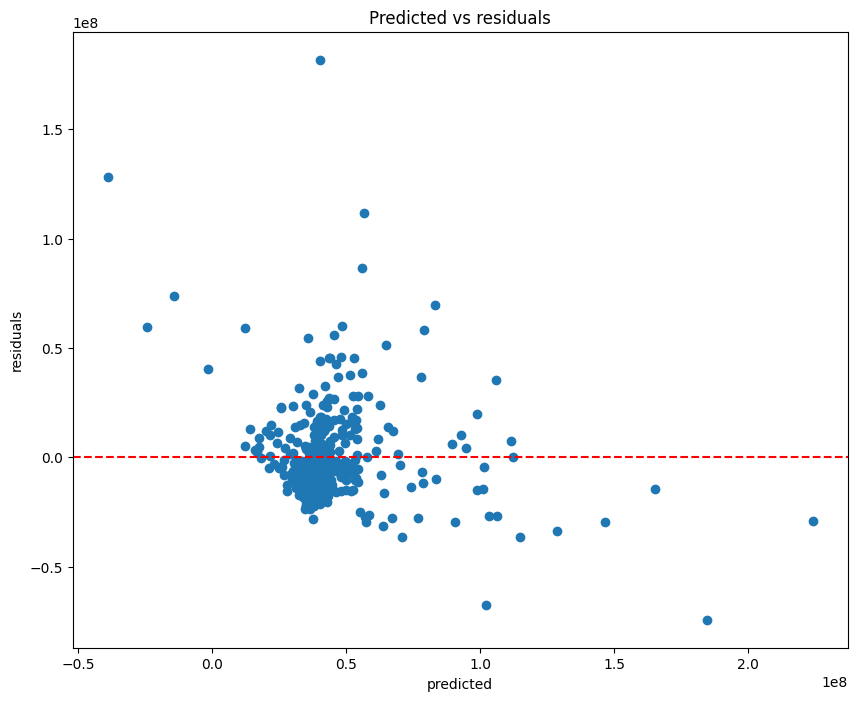

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Predicted vs residuals')
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.show

Text(0.5, 1.0, 'Q-Q Plot')

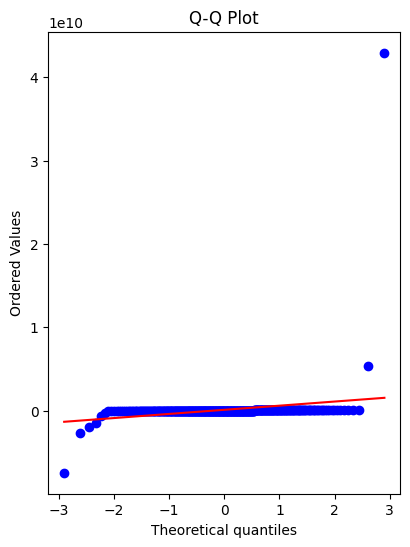

In [57]:
import matplotlib.pyplot as plt
import scipy.stats as stats
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

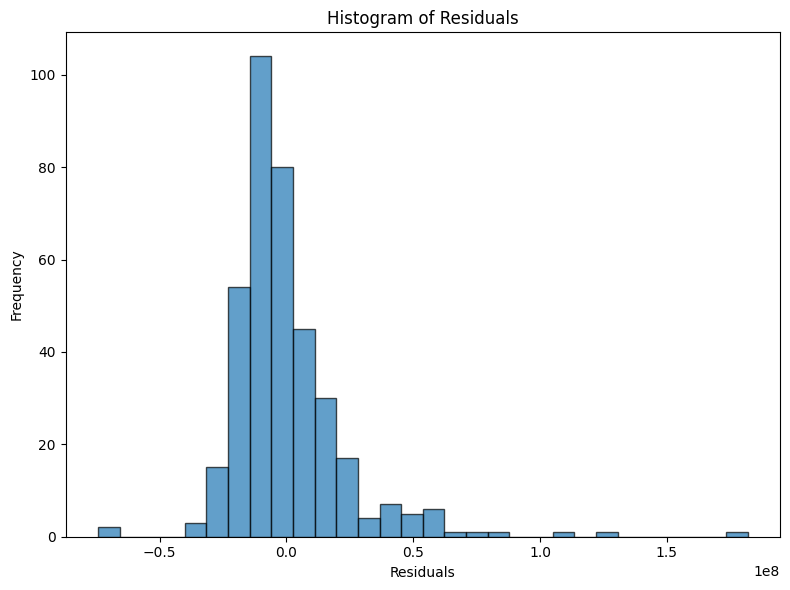

In [68]:

plt.figure(figsize=(8,6))

plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


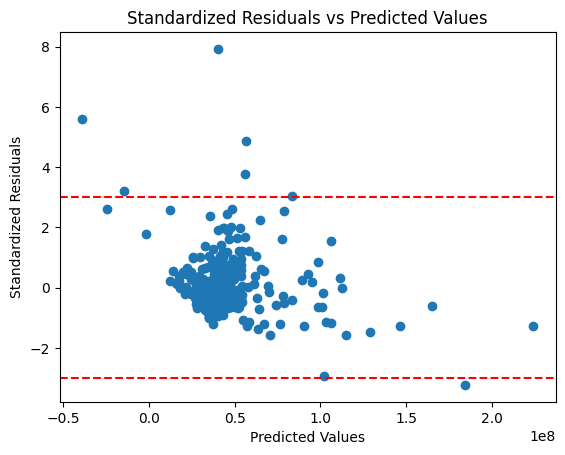

In [67]:
import numpy as np
import matplotlib.pyplot as plt
residuals = y_test - y_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.scatter(y_pred, standardized_residuals)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Predicted Values')
plt.show()
